In [1]:
%matplotlib inline
from cox import readers
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

In [2]:
folders = ['gaussian_kl_unoise', 'gaussian_clip_unoise']

rds = [readers.CollectionReader(f"../src/{f}/agents") for f in folders]

100%|██████████| 80/80 [00:28<00:00,  2.83it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [14]:
games = ["Walker2d-v2", "Hopper-v2", "HalfCheetah-v2", "Reacher-v2"]
code_level_opts = {
      #"kl_penalty": [True, False],
      "kl_penalty_coeff": [0.0, 3.0],
      "clip_eps": [0.2, 1e8],
      "reward_uniform_noise": [0.0, 0.2, 0.5, 0.8],
      "kl_penalty_direction": ["new_to_old"],
      #'clip_advantages': [1e8],
      #'norm_rewards': ['none', 'returns'],
      #'anneal_lr': [False, True],
      #'value_clipping': [False, True],
      #'initialization': ['xavier', 'orthogonal']
}

NUM_BINS = 20

In [19]:
metadata = pd.concat([r.df('metadata')[['exp_id', 'game'] + list(code_level_opts.keys())] for r in rds], axis=0)
opt = pd.concat([r.df('optimization') for r in rds], axis=0)
opt['opt_step'] = opt.index
#nadv = r.df('normalized_advantage')
#nadv['opt_step'] = (nadv.index % 50) * 10

new schema missing keys: set(), new keys: {'kl_closed_form'}
new schema missing keys: set(), new keys: {'kl_closed_form'}
new schema missing keys: set(), new keys: {'kl_closed_form'}
new schema missing keys: set(), new keys: {'kl_closed_form'}
new schema missing keys: set(), new keys: {'kl_closed_form'}
new schema missing keys: set(), new keys: {'kl_closed_form'}
new schema missing keys: set(), new keys: {'kl_closed_form'}
new schema missing keys: set(), new keys: {'kl_closed_form'}
new schema missing keys: set(), new keys: {'kl_closed_form'}
new schema missing keys: set(), new keys: {'kl_closed_form'}
new schema missing keys: set(), new keys: {'kl_closed_form'}
new schema missing keys: set(), new keys: {'kl_closed_form'}
new schema missing keys: set(), new keys: {'kl_closed_form'}
new schema missing keys: set(), new keys: {'kl_closed_form'}
new schema missing keys: set(), new keys: {'kl_closed_form'}
new schema missing keys: set(), new keys: {'kl_closed_form'}
new schema missing keys:

In [20]:
metadata['kl_penalty'] = (metadata['kl_penalty_coeff'] > 0)
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
#constraints = constraints.merge(key_metadata, on='exp_id')
#constraints_heldout = constraints_heldout.merge(key_metadata, on='exp_id')
#nadv = nadv.merge(key_metadata, on='exp_id')
opt = opt.merge(key_metadata, on='exp_id')

In [6]:
#constraints = r.df('paper_constraints_train')
#constraints_heldout = r.df('paper_constraints_heldout')
#constraints = constraints.merge(key_metadata, on='exp_id')
#constraints_heldout = constraints_heldout.merge(key_metadata, on='exp_id')

# Plot mean rewards

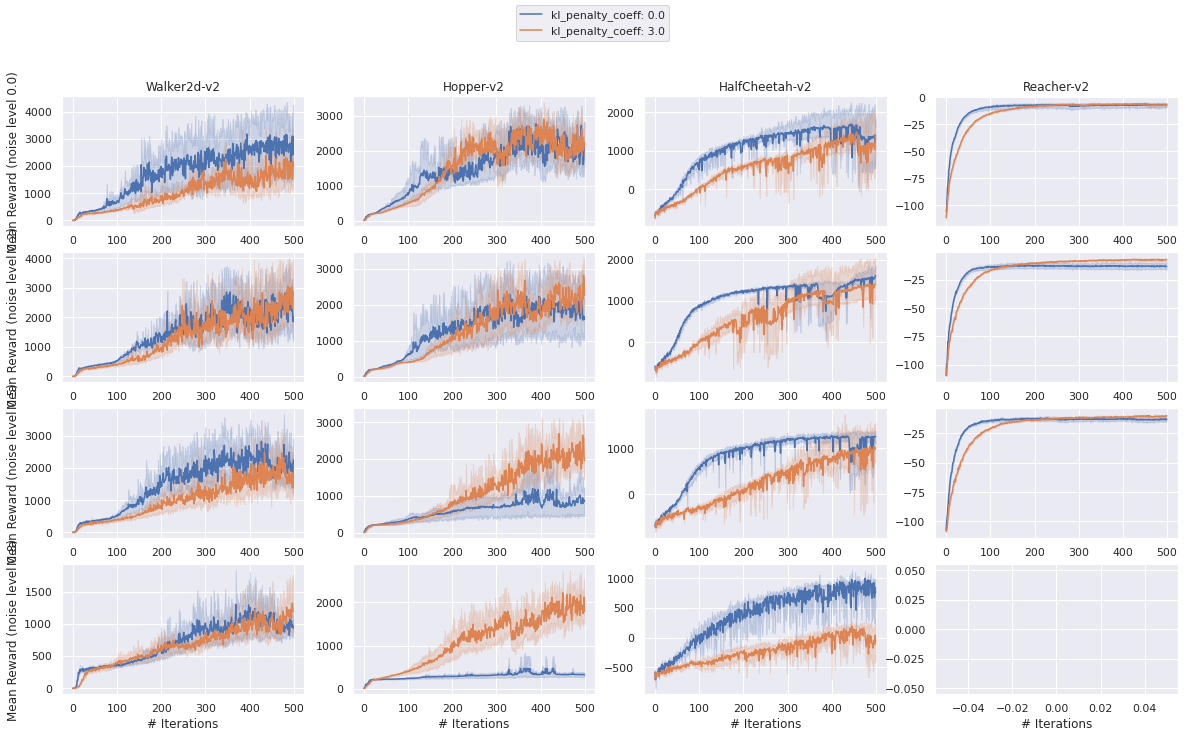

In [22]:
# Plot setup
fig, ax = plt.subplots(4, 4, figsize=(20,11))

noise_type = 'reward_uniform_noise'
cl_opt = 'kl_penalty_coeff'
for j, g in enumerate(games):
    for i, noise_level in enumerate(code_level_opts[noise_type]):
        for b in code_level_opts[cl_opt]:
            filt = opt[(opt[cl_opt] == b) & (opt.game == g) & (opat[noise_type] == noise_level)]
            sns.lineplot(filt.opt_step, filt.mean_reward,
                         ax=ax[i][j], label=f"{cl_opt}: {b}", legend=False, n_boot=100)
    ax[0][j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for i, noise_level in enumerate(code_level_opts[noise_type]):
    ax[i][0].set_ylabel('Mean Reward (noise level %.1f)' % noise_level)
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

plt.show()

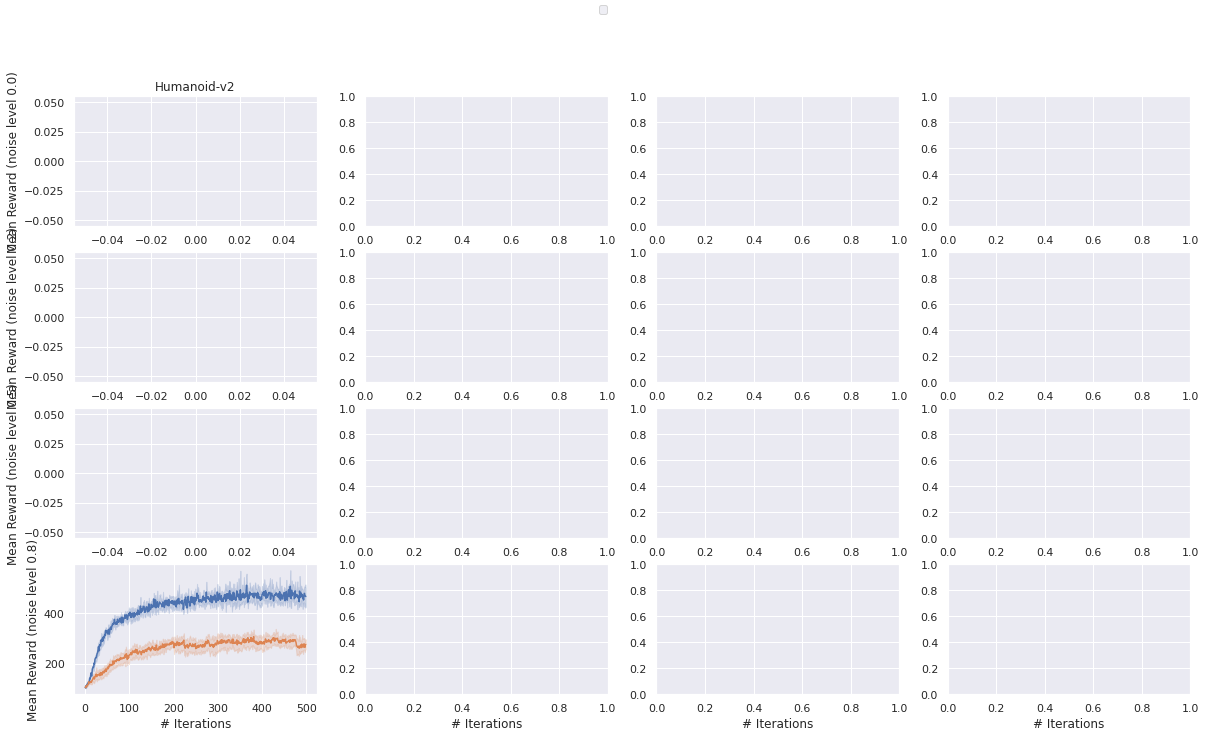

In [24]:
# Plot setup
fig, ax = plt.subplots(4, 4, figsize=(20,11))

noise_type = 'reward_uniform_noise'
cl_opt = 'kl_penalty_coeff'
for j, g in enumerate(['Humanoid-v2']):
    for i, noise_level in enumerate(code_level_opts[noise_type]):
        for b in code_level_opts[cl_opt]:
            filt = opt[(opt[cl_opt] == b) & (opt.game == g) & (opt[noise_type] == noise_level)]
            sns.lineplot(filt.opt_step, filt.mean_reward,
                         ax=ax[i][j], label=f"{cl_opt}: {b}", legend=False, n_boot=100)
    ax[0][j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for i, noise_level in enumerate(code_level_opts[noise_type]):
    ax[i][0].set_ylabel('Mean Reward (noise level %.1f)' % noise_level)
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

plt.show()